In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

### Extract faces from images

In [5]:
# define paths
data_folder = './data/'
data_to_be_prepared_folder = os.path.join(data_folder, 'test')
final_data_mask_folder = os.path.join(data_folder, 'real', 'mask')
final_data_no_mask_folder = os.path.join(data_folder, 'real', 'no_mask')

# define face cascade
face_cascade = cv2.CascadeClassifier('face.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

def extract_and_save_faces(images_input_folder, faces_output_folder, counter_start, mask=True):
    i = counter_start
    for filename in os.listdir(images_input_folder):
        img_path = os.path.join(images_input_folder, filename)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #read image in gray scale
            faces = face_cascade.detectMultiScale(img, 1.2, 5) #detect faces
        except:
            continue
        for (x,y,w,h) in faces:
            sub_img = img[y:y+h, x:x+w] #take part of image that contains the face only
            output_img_path = os.path.join(faces_output_folder, '{}{}.jpg'.format('mask' if mask else 'no_mask', i))
            cv2.imwrite(output_img_path, sub_img) #save part of image that contains the face only
            i += 1
    print('DONE :)')

In [7]:
# extract faces with no masks
extract_and_save_faces(data_to_be_prepared_folder, final_data_mask_folder, 300, True)

DONE :)


### testing & debugging

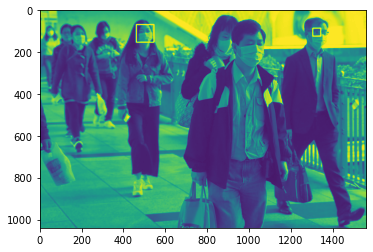

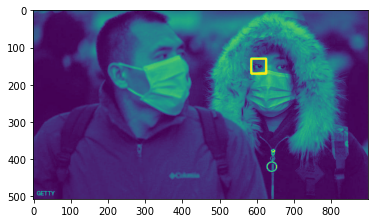

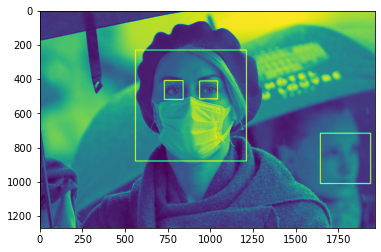

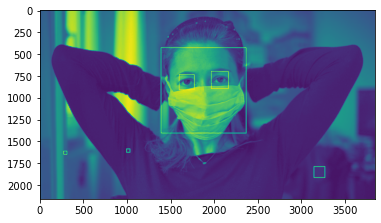

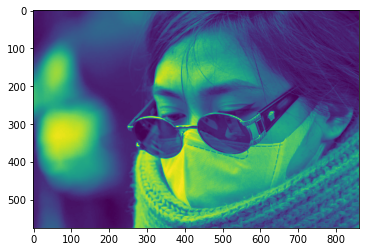

In [29]:
data_to_be_prepared_folder = './data/test'
face_cascade = cv2.CascadeClassifier('face.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

def detect_and_draw(cascade, image):
    detected = cascade.detectMultiScale(image)
    for (x,y,w,h) in detected:
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0), 5)

i=0
for filename in os.listdir(data_to_be_prepared_folder):
    img_path = os.path.join(data_to_be_prepared_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    detect_and_draw(face_cascade, img)
    detect_and_draw(eye_cascade, img)
    plt.imshow(img)
    plt.show()
    i += 1
    if i==5: break

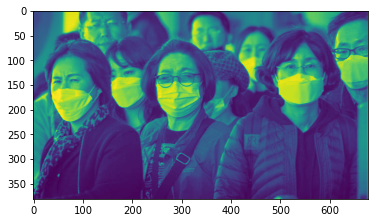

In [40]:
sub_imgs = []
#img = cv2.imread(os.path.join(data_to_be_prepared_folder, '29xp-mask-mediumSquareAt3X.jpg'), cv2.IMREAD_GRAYSCALE)
img = cv2.imread('test.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()
faces = face_cascade.detectMultiScale(img, 1.3, 5)
i = 0
for (x,y,w,h) in faces:
    sub_img = img[y:y+h, x:x+w]
    sub_imgs.append(sub_img)
    #plt.imshow(sub_img)
    #plt.show()
    cv2.imwrite('./data/real/mask/mask_{}.jpg'.format(i), sub_img)
    i += 1

(26, 30, 22, 22)
(64, 27, 25, 25)


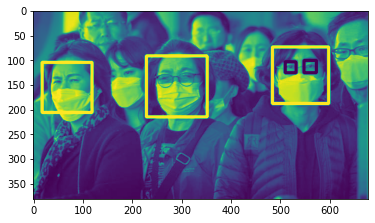

In [54]:
# with eyes (to detect eyes to face params)
img = cv2.imread('test.jpeg', cv2.IMREAD_GRAYSCALE)
faces = face_cascade.detectMultiScale(img, 1.2, 5)
i = 0
for (x,y,w,h) in faces:
    sub_img = img[y:y+h, x:x+w]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
    #cv2.imwrite('./data/real/mask/mask_{}.jpg'.format(i), sub_img)
    eyes = eye_cascade.detectMultiScale(sub_img)
    for (ex,ey,ew,eh) in eyes:
        print((ex,ey,ew,eh))
        cv2.rectangle(sub_img,(ex,ey),(ex+ew,ey+eh),(0,0,255),5)
    i += 1
plt.imshow(img)
plt.show()

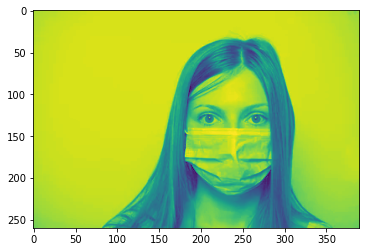

In [7]:
# Load an color image in grayscale
img = cv2.imread('test2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

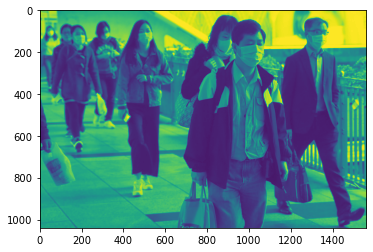

In [17]:

if len(face)>0:
    print(face)
    face = face[0]
    #for (x, y, w, h) in face: cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.rectangle(img, (face[0], face[1]), (face[0] + face[2], face[1] + face[3]), (255, 0, 0), 2)
plt.imshow(img)